# Actividad Evaluable: Patrones con K-means

1. Carga tus datos

In [31]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

datos = pd.read_csv("covid19_tweets.csv")
datos['user_created'] = pd.to_datetime(datos['user_created'])
datos['user_created'] = datos['user_created'].dt.date

datos['date'] = pd.to_datetime(datos['date'])
datos['date'] = datos['date'].dt.date

def fecha_a_numero(fecha):
    return int(fecha.strftime('%Y%m%d'))

def user_verified_num(booleano):
    if(booleano == True):
        return 1
    else:
        return 0   

datos['user_created_entero'] = datos['user_created'].apply(fecha_a_numero)
datos['date_entero'] =  datos['date'].apply(fecha_a_numero)
datos['user_verified_entero'] = datos['user_verified'].apply(user_verified_num)




2. Si determinas que alguna variable no sirve basándose en la actividad pasada, elimínala y justifica por qué quitaste o no variables.

In [32]:
del datos['user_name'] # Algunos datos no se pueden leer correctamente.
del datos['user_location'] # Algunos datos no se pueden leer correctamente.
del datos['user_description'] # Algunos datos no se pueden leer correctamente.
del datos['text'] # Algunos datos no se pueden leer correctamente.
del datos['hashtags'] # Algunos datos no se pueden leer correctamente.
del datos['source'] # Los datos obtenidos por esta columna nos parecen irrevelantes para la información que buscamos obtener.
del datos['is_retweet'] # Este dato es exactamente igual en todas las filas. 

3. Determina un valor de k.  
Usaremos k = 2 debido a que las gráficas generadas se adaptan así de mejor forma.
4. Utilizando scikit-learn calcula los centros del algoritmo k-means.  
Calcularemos los centros de 3 pares de columnas, utilizando las de mayor coeficiente de correlación.

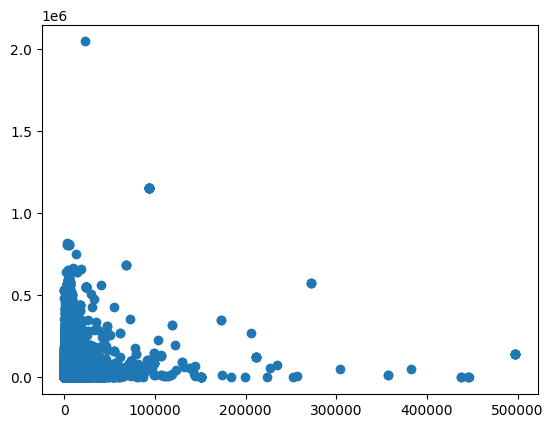

In [33]:
var=[]
for j in range(len(datos["user_friends"])):
  var.append([datos["user_friends"][j], datos["user_favourites"][j]])


var2=np.array(var)
plt.scatter(var2[:,0],var2[:,1])

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


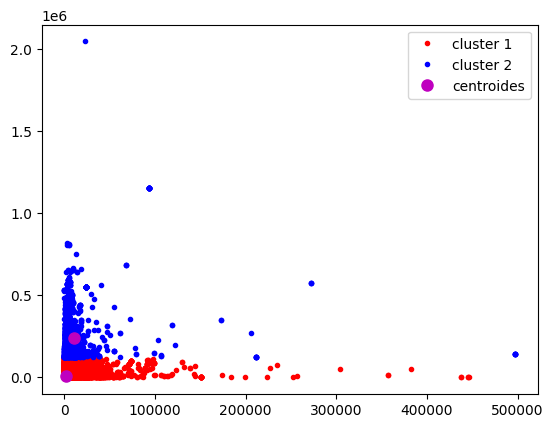

In [34]:
n = 2
k_means = KMeans(n_clusters=n)
k_means.fit(var2)
centroides = k_means.cluster_centers_
etiquetas = k_means.labels_

plt.plot(var2[etiquetas==0,0],var2[etiquetas==0,1],'r.', label='cluster 1')
plt.plot(var2[etiquetas==1,0],var2[etiquetas==1,1],'b.', label='cluster 2')

plt.plot(centroides[:,0],centroides[:,1],'mo',markersize=8, label='centroides')

plt.legend(loc='best')
plt.show()

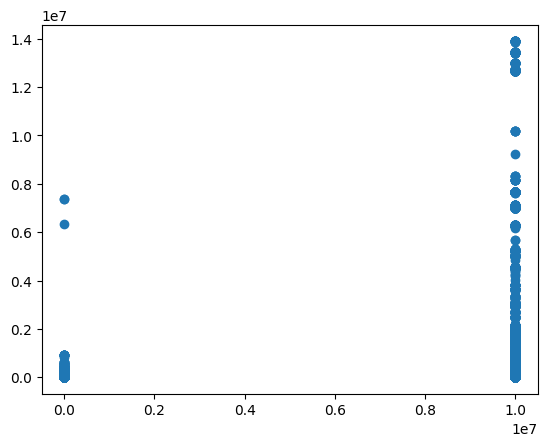

In [35]:
var=[]
for j in range(len(datos["user_verified_entero"])):
  var.append([datos["user_verified_entero"][j]*10000000, datos["user_followers"][j]])


var2=np.array(var)
plt.scatter(var2[:,0],var2[:,1])

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


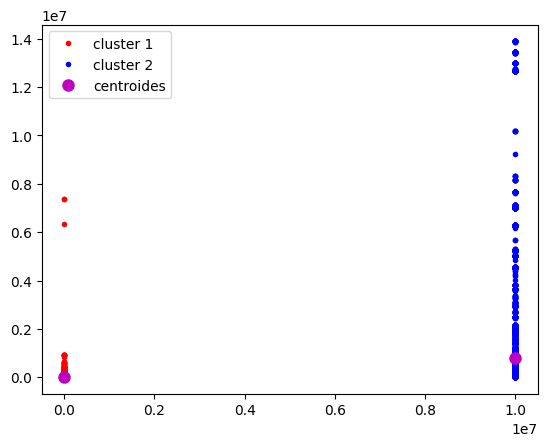

In [36]:
n = 2
k_means = KMeans(n_clusters=n)
k_means.fit(var2)
centroides = k_means.cluster_centers_
etiquetas = k_means.labels_

plt.plot(var2[etiquetas==0,0],var2[etiquetas==0,1],'r.', label='cluster 1')
plt.plot(var2[etiquetas==1,0],var2[etiquetas==1,1],'b.', label='cluster 2')

plt.plot(centroides[:,0],centroides[:,1],'mo',markersize=8, label='centroides')

plt.legend(loc='best')
plt.show()

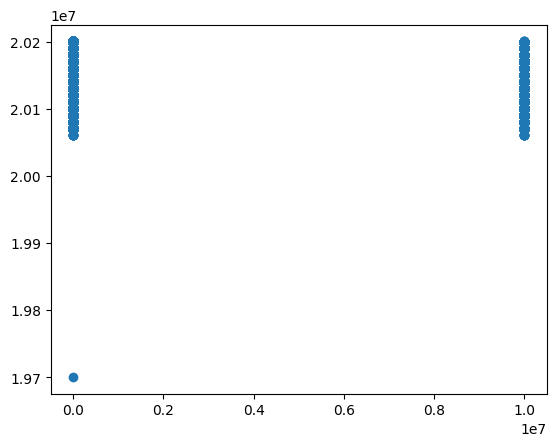

In [37]:

var=[]
for j in range(len(datos["user_verified_entero"])):
  var.append([datos["user_verified_entero"][j]*10000000, datos["user_created_entero"][j]])


var2=np.array(var)
plt.scatter(var2[:,0],var2[:,1])


c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


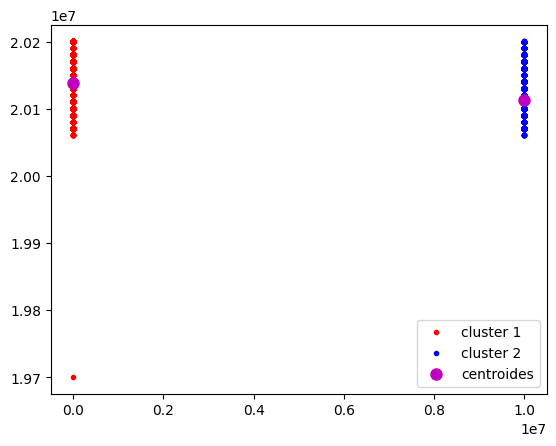

In [38]:
n = 2
k_means = KMeans(n_clusters=n)
k_means.fit(var2)
centroides = k_means.cluster_centers_
etiquetas = k_means.labels_

plt.plot(var2[etiquetas==0,0],var2[etiquetas==0,1],'r.', label='cluster 1')
plt.plot(var2[etiquetas==1,0],var2[etiquetas==1,1],'b.', label='cluster 2')

plt.plot(centroides[:,0],centroides[:,1],'mo',markersize=8, label='centroides')

plt.legend(loc='best')
plt.show()

¿Crees que estos centros pueden ser representativos de los datos? ¿Por qué?  
Los de la primera gráfica no tanto, pues se nota una acumulación de puntos en una única zona, es decir, un único cluster de datos.  
Los de las otras dos gráficas sí, se ve claramente que hay una acumulación de datos en dos lugares exactamente.  

¿Cómo obtuviste el valor de k a usar?    
Vimos las gráficas que generamos y notamos dónde había clusters de datos. 

¿Los centros serían más representativos si usaras un valor más alto? ¿Más bajo?  
Es muy situacional y depende de los datos. En estas gráficas en particular, menos centros fue más representativo. En gráficas en la que se noten varios clusters, serán más representativos más centros.

¿Qué distancia tienen los centros entre sí? ¿Hay alguno que esté muy cercano a otros?  
En la primera gráfica están bastante cercanos, mientras que en las otras dos gráficas si se encuentran más alejados.

¿Qué pasaría con los centros si tuviéramos muchos outliers en el análisis de cajas y bigotes?  
Los centros estarían más alejados de los datos, pues los datos estarían más dispersos.

¿Qué puedes decir de los datos basándote en los centros?  
En la primera gráfica podemos ver que los centros están muy juntos, entonces la acumulación de datos es en realidad en un sólo cluster. Los datos que están lejos de los centros están dispersos y no forman ningún cluster.  
En las otras dos gráficas, podemos notar una clara acumulación de datos en dos centros, debido a que tenemos una variable que sólo puede tener dos valores y una acumulación de datos en cada uno de sus valores.